In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import kagglehub
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from scipy.stats import skew
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Download latest version
path = kagglehub.dataset_download("zaheenhamidani/ultimate-spotify-tracks-db")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'ultimate-spotify-tracks-db' dataset.
Path to dataset files: /kaggle/input/ultimate-spotify-tracks-db


In [12]:
path = "/kaggle/input/ultimate-spotify-tracks-db"
os.listdir(path)

['SpotifyFeatures.csv']

In [13]:
df = pd.read_csv(path + "/SpotifyFeatures.csv")

In [48]:
feature_cols = [
    "danceability",
    "energy",
    "loudness",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence"
]


In [49]:
df = df[feature_cols]

In [50]:
df.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence'],
      dtype='object')

In [51]:
X = df[feature_cols].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca_full = PCA(n_components=0.9)
X_pca_full = pca_full.fit_transform(X_scaled)



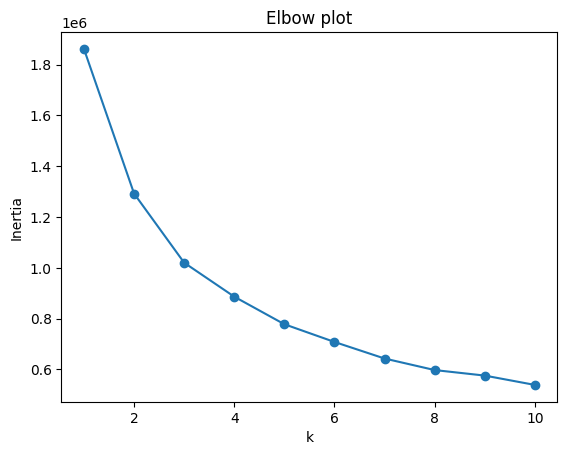

In [52]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(k_values, inertia, marker="o")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow plot")
plt.show()

In [56]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")

df["cluster"] = kmeans.fit_predict(X_scaled)
df.head()


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,cluster,pc1,pc2
0,0.389,0.910,-1.828,0.0525,0.611,0.000,0.3460,0.814,1,1.288882,0.335050
1,0.590,0.737,-5.559,0.0868,0.246,0.000,0.1510,0.816,1,1.451265,-0.433434
2,0.663,0.131,-13.879,0.0362,0.952,0.000,0.1030,0.368,0,-1.632548,-0.227968
3,0.240,0.326,-12.178,0.0395,0.703,0.000,0.0985,0.227,0,-1.845510,-0.329148
4,0.331,0.225,-21.150,0.0456,0.950,0.123,0.2020,0.390,3,-2.749054,0.205950


In [57]:

df.groupby("cluster")[feature_cols].mean()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
cluster,,,,,,,,
0,0.541851,0.378614,-11.067672,0.071377,0.616613,0.080115,0.172531,0.379956
1,0.618226,0.735399,-6.257822,0.101047,0.125686,0.068469,0.207554,0.557116
2,0.562015,0.663893,-11.946966,0.871937,0.783372,0.001420,0.728989,0.414516
3,0.291297,0.165267,-20.708499,0.046858,0.848578,0.678537,0.153699,0.153324


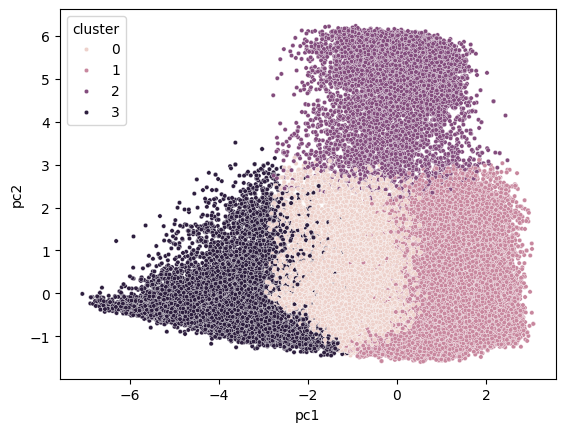

In [61]:

# generates a scatter plot using these two principal components ('pc1' on the x-axis and 'pc2' on the y-axis), with each point colored according to its assigned cluste
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df["pc1"] = X_pca[:, 0]
df["pc2"] = X_pca[:, 1]

sns.scatterplot(data=df, x="pc1", y="pc2", hue="cluster", s=10)
plt.show()
